###ARIMA (AutoRegressive Integrated Moving Average) is a classic time series forecasting technique, ideal for stationary datasets. It combines:

AR: dependency on past values

I: differencing to remove trends

MA: dependency on past forecast errors
I'll use ARIMA to forecast future stock prices based on historical closing data.

In [1]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf

In [2]:
# Load historical stock prices (e.g., Apple)
df = yf.download("AAPL", start="2022-01-01", end="2025-06-17")
data = df["Close"]

<ipython-input-2-2049836032>:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2022-01-01", end="2025-06-17")
[*********************100%***********************]  1 of 1 completed


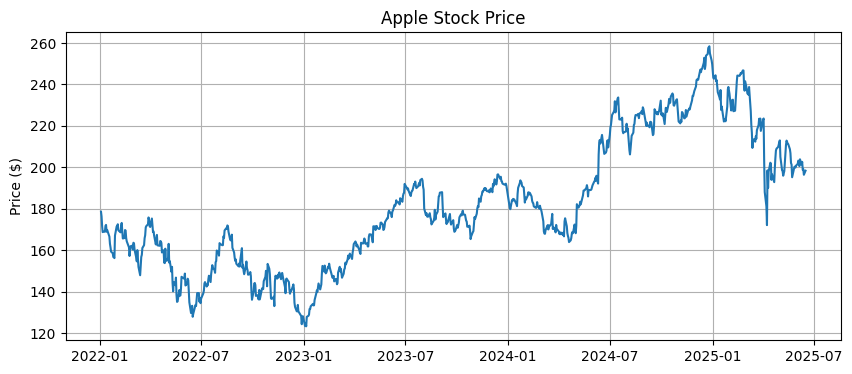

In [3]:
# Plot raw data
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title("Apple Stock Price")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

In [4]:
# Fit ARIMA model (p=5, d=1, q=2)
model = ARIMA(data, order=(5, 1, 2))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [6]:
# Forecast next 30 days
forecast = model_fit.forecast(steps=30)
#print the results
print(forecast)

866    198.776127
867    198.766692
868    199.114136
869    198.835481
870    199.168588
871    198.922683
872    199.193354
873    198.995070
874    199.203249
875    199.046873
876    199.205653
877    199.083469
878    199.204537
879    199.109427
880    199.201830
881    199.127953
882    199.198560
883    199.141266
884    199.195279
885    199.150901
886    199.192259
887    199.157920
888    199.189615
889    199.163067
890    199.187373
891    199.166862
892    199.185513
893    199.169676
894    199.183995
895    199.171773
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [12]:
##printing actual vs predicted back testing
print(df.index[-1])
print(pd.date_range(df.index[-1], periods=30, freq='B'))

2025-06-16 00:00:00
DatetimeIndex(['2025-06-16', '2025-06-17', '2025-06-18', '2025-06-19',
               '2025-06-20', '2025-06-23', '2025-06-24', '2025-06-25',
               '2025-06-26', '2025-06-27', '2025-06-30', '2025-07-01',
               '2025-07-02', '2025-07-03', '2025-07-04', '2025-07-07',
               '2025-07-08', '2025-07-09', '2025-07-10', '2025-07-11',
               '2025-07-14', '2025-07-15', '2025-07-16', '2025-07-17',
               '2025-07-18', '2025-07-21', '2025-07-22', '2025-07-23',
               '2025-07-24', '2025-07-25'],
              dtype='datetime64[ns]', freq='B')


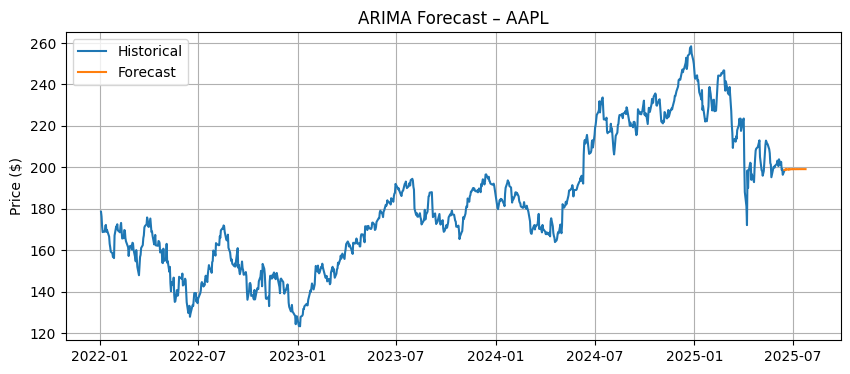

In [8]:
# Plot forecast
plt.figure(figsize=(10, 4))
plt.plot(data, label="Historical")
plt.plot(pd.date_range(data.index[-1], periods=30, freq='B'), forecast, label="Forecast")
plt.title("ARIMA Forecast – AAPL")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()